<a href="https://colab.research.google.com/github/hassangaber/ECSE343-final/blob/master/final_notebook_hassan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries: Numpy, Sympy, Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sys
from sympy import *
import timeit
import random

## Objective function graphical representations

### Himmelblau Function

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


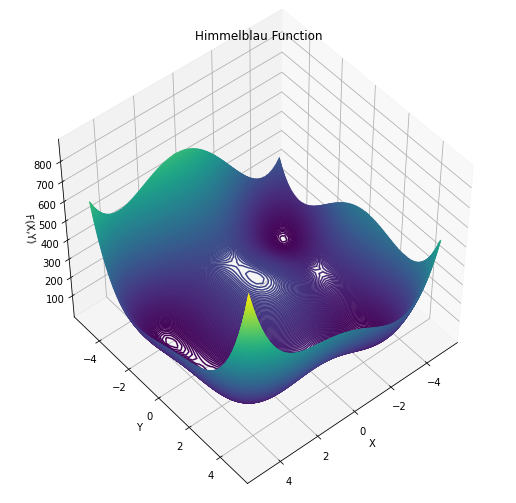

In [2]:
# The Himmelblau Function
def Himmelblau(x0:float,x1:float)->float:
    return (x0**2+x1-11)**2 + ((x0+x1**2-7)**2)

# https://www.indusmic.com/post/himmelblau-function
X=np.linspace(-5,5)
Y=np.linspace(-5,5)
x,y=np.meshgrid(X,Y)
F=Himmelblau(x,y)

fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(x,y,F,450)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F(X,Y)')
ax.set_title('Himmelblau Function')
ax.view_init(50,50)

plt.show()

### Rosenbrock Function (2-D and N-D)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


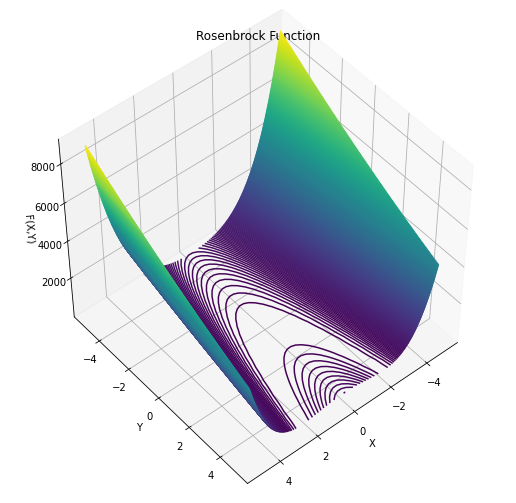

In [3]:
# The 2D Rosenbrock function
def Rosenbrock2D(x0:float,x1:float,b:int=10)->float:
    return ((x0-1)**2 + b*(x1-x0**2)**2)

X=np.linspace(-5,5)
Y=np.linspace(-5,5)
x,y=np.meshgrid(X,Y)
F=Rosenbrock2D(x,y)

fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(x,y,F,450)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F(X,Y)')
ax.set_title('Rosenbrock Function')
ax.view_init(50,50)

plt.show()

## Sympy Enviroment, Gradient, & Hessian (for $N ≼ 6 $ dimensions)

In [4]:
x1, x2 = symbols('x1 x2')

# rosenbrock 2D
rosenbrock_2d = (1-x1)**2 + 100*(x2-x1**2)**2

# himmelblau
himmelblau = (x1**2+x2-11)**2 + (x1+x2**2-7)**2

# furthermore, we can define the 2D functions as lambdas
f_himm=lambda x,y: ((x**2+y-11)**2) + (((x+y**2-7)**2))

f_rosen=lambda x,y: (x-1)**2 + 100*(y-x**2)**2

In [5]:
# The N-dimensional Rosebrock function
def ND_Gradient(func,N):
    assert N%2==0, "Invalid N"
    var_list = []
    
    for i in range(1,N+1):
        var_list.append("x"+str(i))
    var_list = symbols(var_list)
    
    return lambdify(var_list,derive_by_array(func,var_list))

In [6]:
def ND_Hessian(func,N):
    assert N%2==0, "Invalid N"
    var_list = []
    
    for i in range(1,N+1):
        var_list.append("x"+str(i))
    var_list = symbols(var_list)
    
    return lambdify(var_list,hessian(func,var_list))

In [130]:
x1, x2, x3, x4, x5, x6 = symbols('x1 x2 x3 x4 x5 x6')
rosenbrock_4d=((100*(x1**2-x2)**2+(x1-1)**2)+(100*(x3**2-x4)**2+(x3-1)**2))
rosenbrock_6d=((100*(x1**2-x2)**2+(x1-1)**2)+(100*(x3**2-x4)**2+(x3-1)**2)+(100*(x5**2-x6)**2+(x5-1)**2))

# The (4) Optimization Methods

- Newton's method
    * no line search, no damping
    * with damping, no line search
    * line search only
- Gradient Descent

## Hyperparameters
0. Stopping factors: Max Iterations $i$ and Tolerance $epsilon$

- Newton's method
1. Line search step vector $\vec{p_k}$ 
2. Damping factor $\gamma$

- Gradient Descent
3. Learning rate $\alpha$
4. Momentum $\beta$


## I. Newton's Method: No Line Search, No Damping

- Iteratively solve while defining a tolerance $\epsilon$ : 

  $x_{k+1}=x_{k}-\frac{f'(x_{k})}{f''(x_{k})}$

- However, for the 2D case, the iterative method will be defined as:
[https://math.stackexchange.com/q/457915]

  $x_{k+1}=x_{k}-\frac{\nabla f(x_k)}{\mathbf{H_f}}$

- Solution converges for:

  $ |x_{k+1}-x_{k}|<\epsilon$

- Where $\epsilon$ (hyperparameter) is defined as a constant with magnitude $10^{-6}$.
- There is another convergence condition defined as $\text{max_iter}$ which does not allow the iterations to exceed a certain threshold.

In [8]:
# Newton's method for optimization implemented with no line search nor damping
# Need to find hessian and gradient using sympy
def Newton_1(func,N,xinit,gamma:float=1.0,max_iter:int=10e3,epsilon:float=10e-6):
    #define initial guess given by the x parameter
    x_now = xinit
    
    # define the gradient and hessian of the given function
    G = ND_Gradient(func,N)
    H = ND_Hessian(func,N)
    
    #perform the iterative portion of Newton Optimization
    max_iter = int(max_iter)
    for i in range(max_iter):
        x_next=x_now-(np.dot(gamma*np.linalg.inv(H(*x_now)),G(*x_now)))
        
        if (x_next - x_now).all() < epsilon:
            return x_now
        else:
            x_now = x_next
        
        
    return x_now

In [9]:
# Testing Newton 1
# vector with elements {9,9} as a starting point
guess=9*np.ones(2)
print("Himmelblau Global Minima: ",Newton_1(himmelblau,2,guess))
guess=7*np.ones(2)
print("2D Rosenbrock Global Minima: ",Newton_1(rosenbrock_2d,2,guess))

Himmelblau Global Minima:  [3. 2.]
2D Rosenbrock Global Minima:  [1. 1.]


## II. Newton's Method: With Damping $\gamma$, No Line Search

- The only modification to the original Newton Method includes multiplying the second term in the iterative algorithm by a factor, this factor is considered a hyperparameter:

  $x_{k+1}=x_{k}-\gamma [\frac{\nabla f(x_k)}{\mathbf{H_f}}],0<\gamma<1 $



In [110]:
# Newton's method with damping
# Use Newton 1 function with non-trivial gamma value
def Newton_2(func,N,xinit,gamma,max_iter:int=10e3,epsilon:float=10e-6):
    #assert gamma < 1, "Use Newton_1 instead"
    _x = Newton_1(func,N,xinit,gamma,max_iter,epsilon)
    return _x

In [111]:
# Testing Newton_2
guess=9*np.ones(2)
gammas=[0.1,0.3,0.5,0.75,0.8,0.95]
for g in gammas:
  print("gamma ",g)
  start=timeit.default_timer()
  print("Himmelblau Global Minima: ",Newton_2(himmelblau,2,guess,g))
  end=timeit.default_timer()
  print("Function runtime ", str(end-start))

  start=timeit.default_timer()
  print("2D Rosenbrock Global Minima: ",Newton_2(rosenbrock_2d,2,guess,g))
  end=timeit.default_timer()
  print("Function runtime ", str(end-start))

gamma  0.1
Himmelblau Global Minima:  [3. 2.]
Function runtime  0.13833172199974797
2D Rosenbrock Global Minima:  [1. 1.]
Function runtime  2.141878456000086
gamma  0.3
Himmelblau Global Minima:  [3. 2.]
Function runtime  0.07311060699976224
2D Rosenbrock Global Minima:  [1. 1.]
Function runtime  2.190219097999943
gamma  0.5
Himmelblau Global Minima:  [3. 2.]
Function runtime  0.07033415299974877
2D Rosenbrock Global Minima:  [1. 1.]
Function runtime  2.1275697799997033
gamma  0.75
Himmelblau Global Minima:  [3. 2.]
Function runtime  0.05084253799986982
2D Rosenbrock Global Minima:  [1. 1.]
Function runtime  0.04990478600029746
gamma  0.8
Himmelblau Global Minima:  [3. 2.]
Function runtime  0.061868174000210274
2D Rosenbrock Global Minima:  [1. 1.]
Function runtime  1.7410406929998317
gamma  0.95
Himmelblau Global Minima:  [3. 2.]
Function runtime  0.06846224800028722
2D Rosenbrock Global Minima:  [1. 1.]
Function runtime  0.047750169999744685


## III. Newton's Method: Line Search Only

In [48]:
###### Backtracking linear search
def lineSearch(func,N,xinit):
    #initialize guess: alpha>0
    alpha = 0.2
  
    #set search direction p
    G = ND_Gradient(func,N)
    #G_x = np.array(G(*xinit))
    #p = -G_x
    p=-np.array(G(*xinit))
    print(p)

    # c defined as c->(0,1)
    c = .65
    
    #initialize Beta -> (0,1)
    Beta = .1
    
    # create a variable list to lambdify function
    var_list = []
    
    for i in range(1,N+1):
        var_list.append("x"+str(i))
    var_list = symbols(var_list)
    
    #lamdify
    f = lambdify(var_list,func)

    # define while loop parameters
    while (f(*xinit+alpha*p)>f(*xinit)+c*alpha*np.dot(np.array(G(*xinit)).T,np.array(p))):
        alpha = Beta * alpha
  
    return alpha

In [205]:
def lsearch(func,N,xinit,alpha,beta):

  # step direction
  G=ND_Gradient(func,N)
  p=-np.array(G(*xinit))
  #m=np.array(G(*xinit)).T@p
  #c=0.65
  #alpha=0.5
  #beta=0.5
  t=1.0

  # create a variable list to lambdify function
  var_list = []
  for i in range(1,N+1):
      var_list.append("x"+str(i))
  var_list = symbols(var_list)

  f=lambdify(var_list,func)

  while (f(*xinit)-(f(*xinit-t*p)+np.dot(t*alpha,np.outer(p,p)))[0,0]) <0:
    print(t)
    t*=beta

  return t

In [206]:
# Newton's method: Line Search
# Implement using a backtracking line search
# use the alpha value found as gamma in the Newton Method
def Newton_3(func,N,xinit,alpha,beta,max_iter:int=10e3,epsilon:float=10e-6):    
    #alpha = lineSearch(func,N,xinit)
    #rint(alpha)
    alpha=lsearch(func,N,xinit,alpha,beta)
    _x = Newton_2(func,N,xinit,alpha,max_iter,epsilon)
    return _x

In [207]:
alpha=[0.5,0.8]
beta=[0.25,0.4]
xnow=4*np.ones(2)

for a in alpha:
  for b in beta:
    print(Newton_3(rosenbrock_2d,2,xnow,a,b))

-1.3618055475557208e+19
1.0
0.25
0.0625
0.015625
0.00390625
0.0009765625
0.000244140625
6.103515625e-05
1.52587890625e-05
3.814697265625e-06
9.5367431640625e-07
2.384185791015625e-07
5.960464477539063e-08
1.4901161193847656e-08
3.725290298461914e-09
9.313225746154785e-10
2.3283064365386963e-10
5.820766091346741e-11
1.4551915228366852e-11
3.637978807091713e-12
9.094947017729282e-13
2.2737367544323206e-13
5.684341886080802e-14
1.4210854715202004e-14
3.552713678800501e-15
8.881784197001252e-16
2.220446049250313e-16
5.551115123125783e-17
1.3877787807814457e-17
3.469446951953614e-18
8.673617379884035e-19
2.168404344971009e-19
5.421010862427522e-20
1.3552527156068805e-20
[4. 4.]
-1.3618055475557208e+19
1.0
0.4
0.16000000000000003
0.06400000000000002
0.025600000000000008
0.010240000000000004
0.0040960000000000015
0.0016384000000000008
0.0006553600000000003
0.0002621440000000001
0.00010485760000000006
4.1943040000000025e-05
1.677721600000001e-05
6.7108864000000044e-06
2.684354560000002e-06
1.0

## IV. Gradient Descent

- Implementing the algorithm (without momentum):

    $x_{k+1}= x_{k} - \alpha_k ∇f(x_{k})^T$

- Gradient descent with momentum $\beta$:

    $x_{k+1}= x_{k} - \alpha_k ∇f(x_{k})^T + \beta \Delta x_k $

where


$\Delta x_k = \beta \Delta x_{k-1} - \alpha_{k-1}∇f(x_{k-1})^T $

  $ → x_{k+1}= x_{k} - \alpha_k ∇f(x_{k})^T  + \beta[ \Delta x_{k-1} -\alpha_{k-1}∇f(x_{k-1})^T]$

In [15]:
def round_solution(val)->int:
  if (float(val) % 1) >= 0.5:
    x = math.ceil(val)
  else:
    x = round(val)
  return x

In [16]:
def gradient_descent_1(func,N,x_init,alpha=1e-3,epsilon=1e-8,max_iter=10e4):
  """
  param 1: objective function
  param 2: dimension
  param 3: initial guess (starting point)
  param 4: learning rate
  param 5: tolerance
  param 6: maximum iterations

  returns: Function global minima coordinates
  """

  # lambda expression for function gradinet
  G=ND_Gradient(func,N)
  x_now=x_init
  g=np.inf
  t:int=0

  while True:

    x_next=x_now-alpha*np.transpose(G(*x_now))

    if abs(list(np.array(x_next)-np.array(x_now))[0])<epsilon or t>max_iter:
      return x_now

    x_now = x_next
    t+=1

  return x_now


In [17]:
guess=[0.004,0.7]
print(gradient_descent_1(rosenbrock_2d,2,guess))
print(gradient_descent_1(himmelblau,2,guess))

[0.99997497 0.99994984]
[2.99999962 2.00000092]


In [18]:
guess_=2*np.ones(6)
print(gradient_descent_1(rosenbrock_6d,6,guess_))

[1.00002503 1.00005016 1.00002503 1.00005016 1.00002503 1.00005016]


In [19]:
def gradient_descent_2(func,N,x_init,beta,alpha=1e-3,epsilon=1e-8,max_iter=10e4):
  """
  param 1: objective function
  param 2: dimension
  param 3: initial guess (starting point)
  param 4: momentum
  param 5: learning rate
  param 6: tolerance
  param 7: maximum iterations

  returns: Function global minima coordinates
  """

  # lambda expression for function gradinet
  G=ND_Gradient(func,N)
  x_now=x_init
  g=np.inf
  t:int=0
  grad_=[]

  while True:

    if t<2: 
      g=np.array(G(*x_now))

    else:
      g=(beta*np.array(grad_[t-1]))+((1-beta)*np.array(G(*x_now)))
      
    x_next=x_now-alpha*g
    grad_.append(g)

    #print(f'g {g}.   xk+1 {x_next}')

    if abs(list(np.array(x_next)-np.array(x_now))[0])<epsilon or t>max_iter:
      return x_now

    x_now = x_next
    t+=1

  return x_now

In [20]:
guess=[0.0072,0.1]
print(gradient_descent_2(rosenbrock_2d,2,guess,0.001))
print(gradient_descent_2(rosenbrock_2d,2,guess,0.3))
print(gradient_descent_2(rosenbrock_2d,2,guess,0.5))
print(gradient_descent_2(rosenbrock_2d,2,guess,0.7))
print(gradient_descent_2(rosenbrock_2d,2,guess,0.99))

[0.99997497 0.99994984]
[0.99997497 0.99994983]
[0.99997498 0.99994986]
[0.99997499 0.99994987]
[0.999976   0.99995191]


In [21]:
guess=[1,0.3]
print(gradient_descent_2(himmelblau,2,guess,0.001))
print(gradient_descent_2(himmelblau,2,guess,0.5))
print(gradient_descent_2(himmelblau,2,guess,0.85))

[3.00000038 1.99999907]
[3.00000038 1.99999909]
[3.00000031 1.99999925]
